### (a) Questions:

1. Read the data
2. Display the first and last 5 rows
3. Display the number of rows and columns
4. Display the number of categorical and numerical columns
5. For numerical columns, display the min, max and mode
6. Display the columns with null values
7. Calculate the 5 number summary and correlate with box plot (Python code)
8. Display the outlier values using Z-score (Python code)
9. Display the features with high positive correlation, high negative correlation and no correlation (Python code)
10. Analyze the skewness of the features using plot distribution graph and display the features with right skew, left skew and no skew (Python code)
11. Perform univariate analysis for categorical variables using bar plot
12. Perform univariate analysis for continuous variables using swarm plot and violin plot
13. Display the scatter plot to show the relationship between two continuous variables
14. Perform a bivariate analysis between continuous variable and categorical variable using categorical plot
15. Display the counts of observations for categorical variable using count plot
16. Perform a multivariate analysis between features using pair plot


In [22]:
import pandas as pd
import numpy as np

# Create a sample dataset
np.random.seed(0)
data = pd.DataFrame({
    'ID': range(1, 101),
    'Age': np.random.randint(18, 70, size=100),
    'Gender': np.random.choice(['Male', 'Female'], size=100),
    'Income': np.random.randint(20000, 100000, size=100),
    'Education': np.random.choice(['High School', 'College', 'Bachelor', 'Master', 'PhD'], size=100),
    'Score': np.random.randint(0, 100, size=100)
})

# Save the dataset to a CSV file
data.to_csv('sample_dataset.csv', index=False)


In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Read the data
data = pd.read_csv('sample_dataset.csv')

In [24]:
# Display the first and last 5 rows
print("First 5 rows:")
print(data.head())
print("\nLast 5 rows:")
print(data.tail())

First 5 rows:
   ID  Age  Gender  Income Education  Score
0   1   62  Female   60800       PhD      6
1   2   65  Female   35620       PhD     81
2   3   18  Female   90381  Bachelor     71
3   4   21  Female   74268    Master     84
4   5   21    Male   89069    Master     89

Last 5 rows:
     ID  Age  Gender  Income    Education  Score
95   96   32    Male   72513  High School     91
96   97   33  Female   74545  High School     67
97   98   38    Male   40989      College     84
98   99   53  Female   22562  High School     71
99  100   41    Male   42597       Master     83


In [25]:
# Display the number of rows and columns
print("\nNumber of rows:", len(data))
print("Number of columns:", len(data.columns))


Number of rows: 100
Number of columns: 6


In [26]:
# Display the number of categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(exclude=['object']).columns
print("\nNumber of categorical columns:", len(categorical_cols))
print("Number of numerical columns:", len(numerical_cols))


Number of categorical columns: 2
Number of numerical columns: 4


In [27]:
# For numerical columns, display the min, max and mode
print("\nSummary for numerical columns:")
print(data.describe())

# Display the columns with null values
print("\nColumns with null values:")
print(data.columns[data.isnull().any()])


Summary for numerical columns:
               ID         Age        Income      Score
count  100.000000  100.000000    100.000000  100.00000
mean    50.500000   41.570000  60933.330000   50.06000
std     29.011492   15.537023  23777.168814   30.18188
min      1.000000   18.000000  20469.000000    0.00000
25%     25.750000   29.000000  39101.500000   24.00000
50%     50.500000   41.000000  62101.000000   53.00000
75%     75.250000   55.250000  82914.500000   74.50000
max    100.000000   69.000000  99983.000000   99.00000

Columns with null values:
Index([], dtype='object')


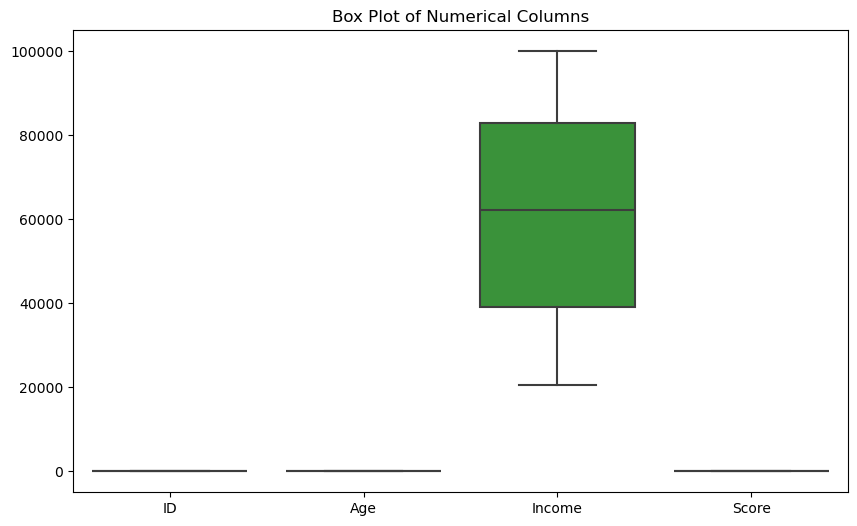

In [28]:
# Calculate the 5 number summary and correlate with box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[numerical_cols])
plt.title("Box Plot of Numerical Columns")
plt.show()

In [29]:
# Display the outlier values using Z-score
z_scores = zscore(data[numerical_cols])
outliers = (z_scores > 3) | (z_scores < -3)
outlier_indices = data.index[outliers.any(axis=1)]
print("\nOutlier values:")
print(data.loc[outlier_indices])


Outlier values:
Empty DataFrame
Columns: [ID, Age, Gender, Income, Education, Score]
Index: []


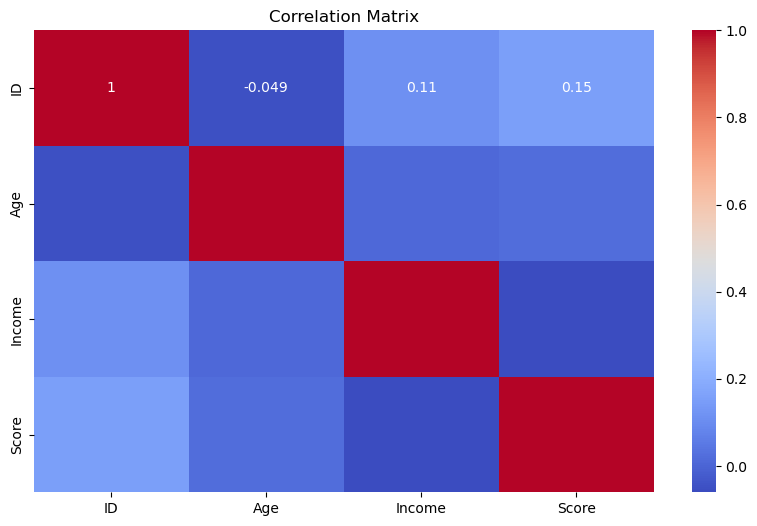

In [30]:
# Drop non-numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Display the features with high positive correlation, high negative correlation and no correlation
plt.figure(figsize=(10, 6))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

C:\Users\mehra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


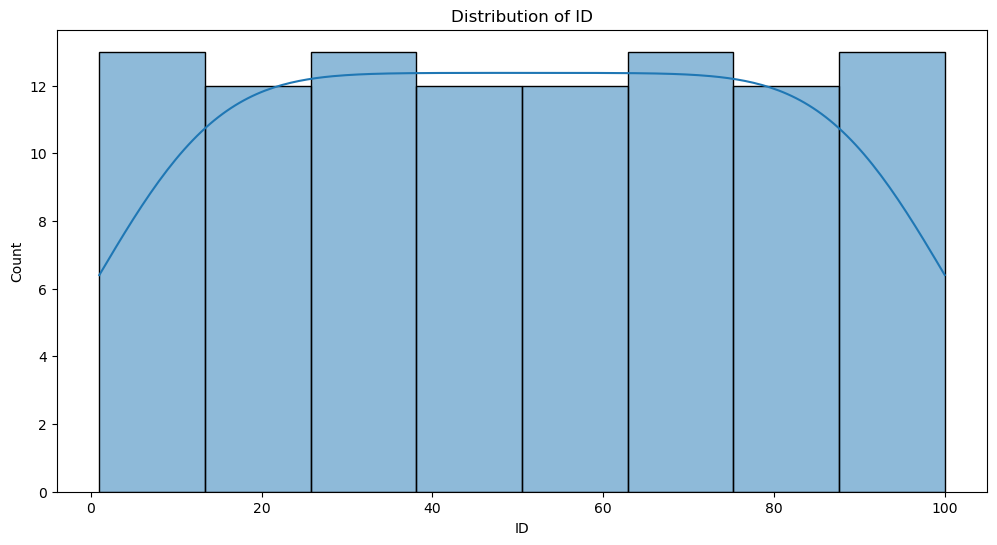

C:\Users\mehra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


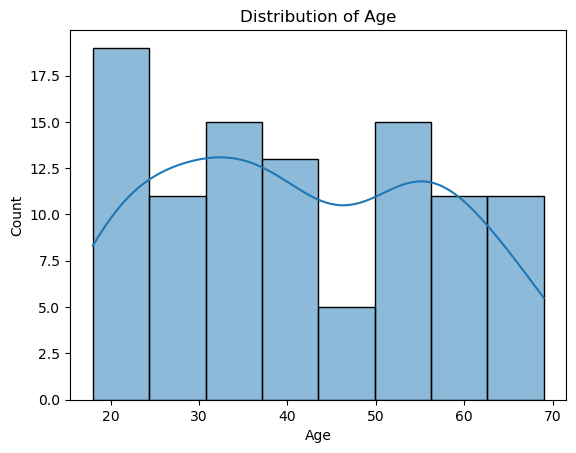

C:\Users\mehra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


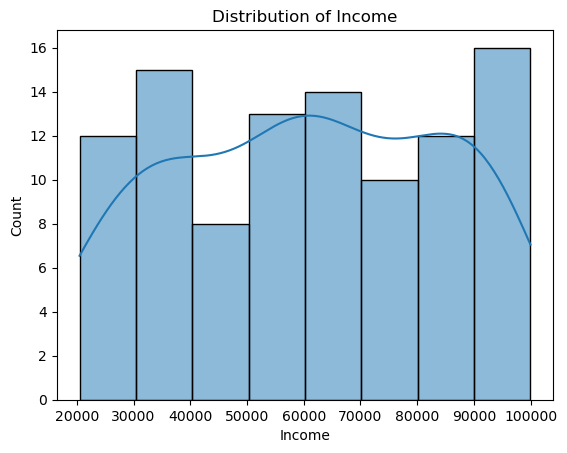

C:\Users\mehra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


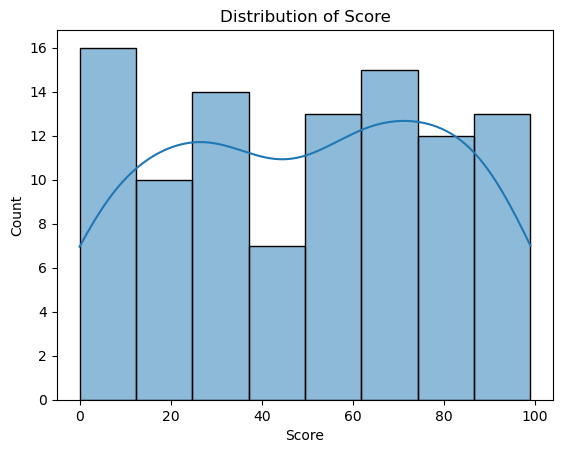

In [31]:
# Analyze the skewness of the features using plot distribution graph
plt.figure(figsize=(12, 6))
for col in numerical_cols:
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

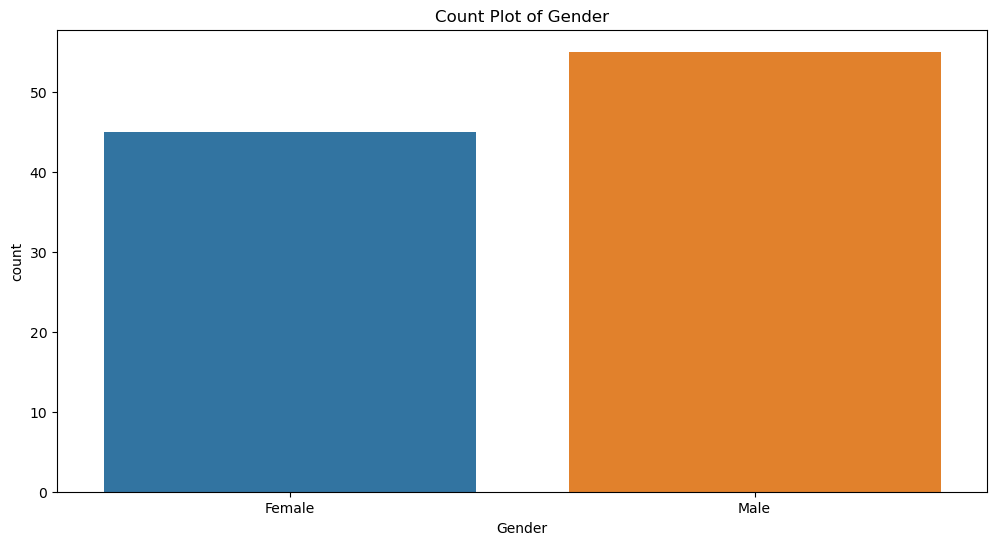

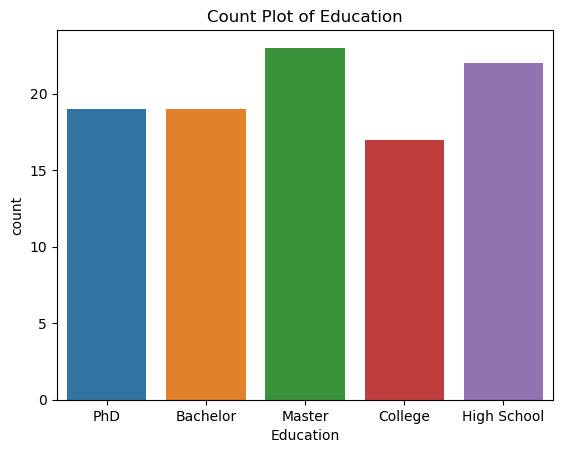

In [32]:
# Perform univariate analysis for categorical variables using bar plot
plt.figure(figsize=(12, 6))
for col in categorical_cols:
    sns.countplot(x=col, data=data)
    plt.title(f"Count Plot of {col}")
    plt.show()

C:\Users\mehra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mehra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


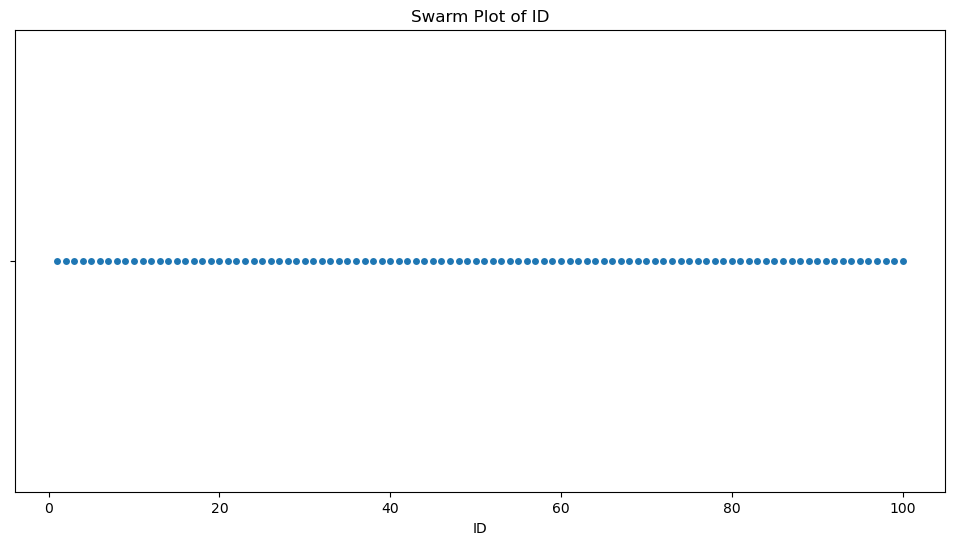

C:\Users\mehra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mehra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


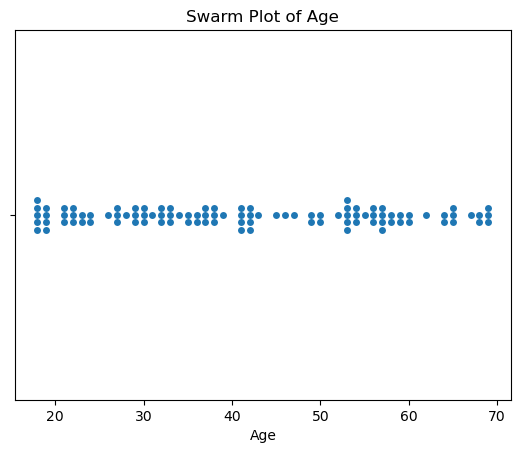

C:\Users\mehra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mehra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


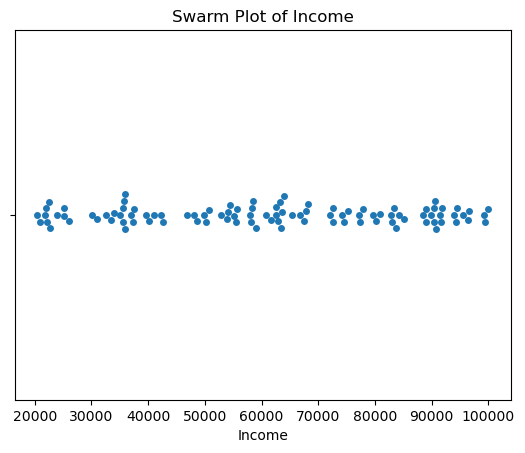

C:\Users\mehra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mehra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


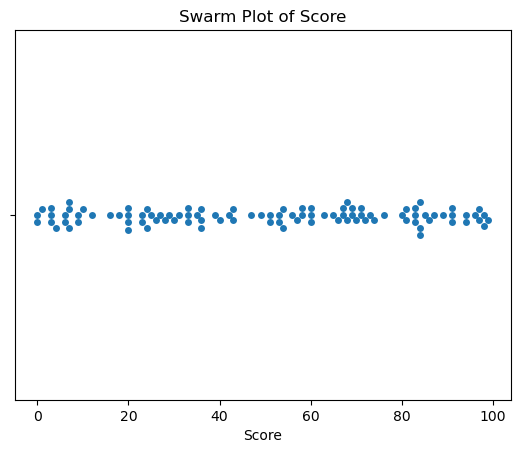

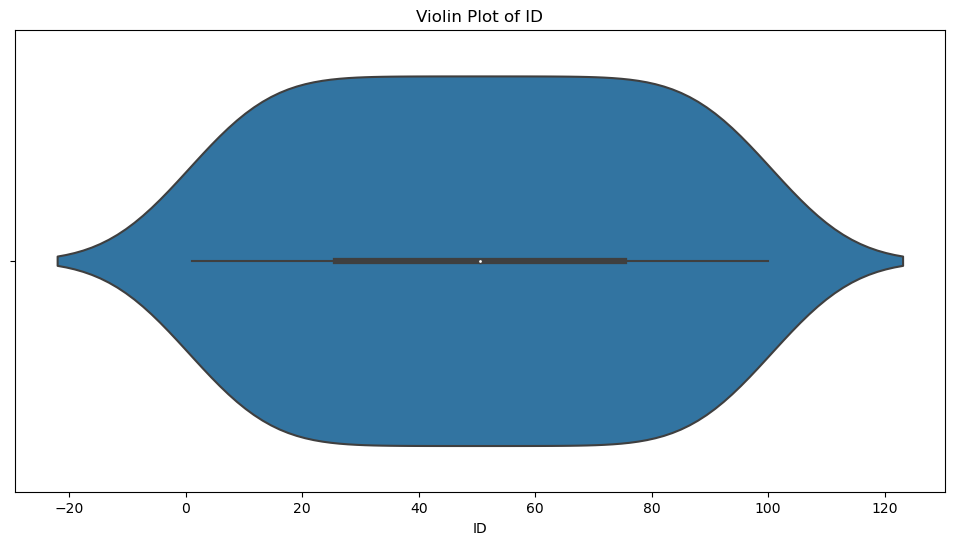

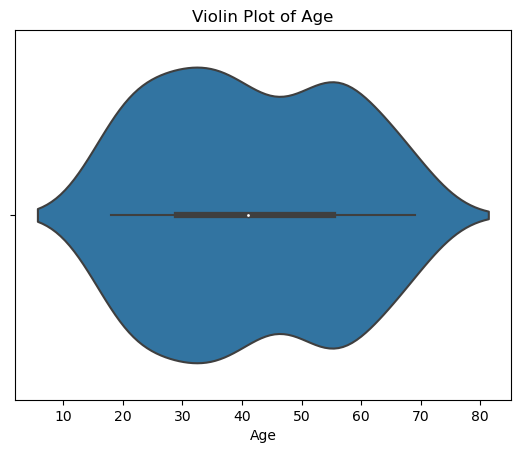

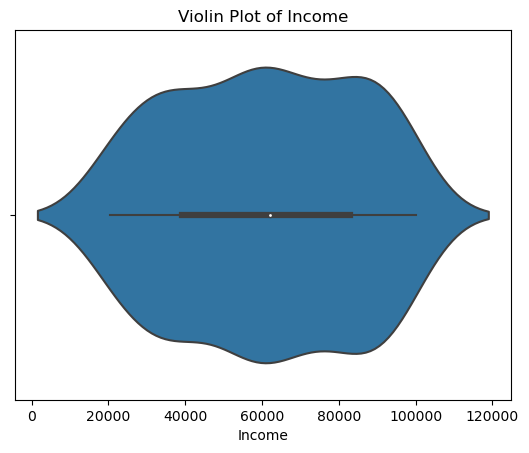

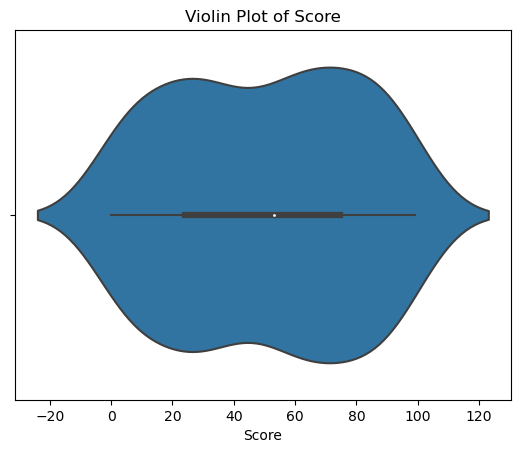

In [33]:
# Perform univariate analysis for continuous variables using swarm plot and violin plot
plt.figure(figsize=(12, 6))
for col in numerical_cols:
    sns.swarmplot(x=col, data=data)
    plt.title(f"Swarm Plot of {col}")
    plt.show()

plt.figure(figsize=(12, 6))
for col in numerical_cols:
    sns.violinplot(x=col, data=data)
    plt.title(f"Violin Plot of {col}")
    plt.show()

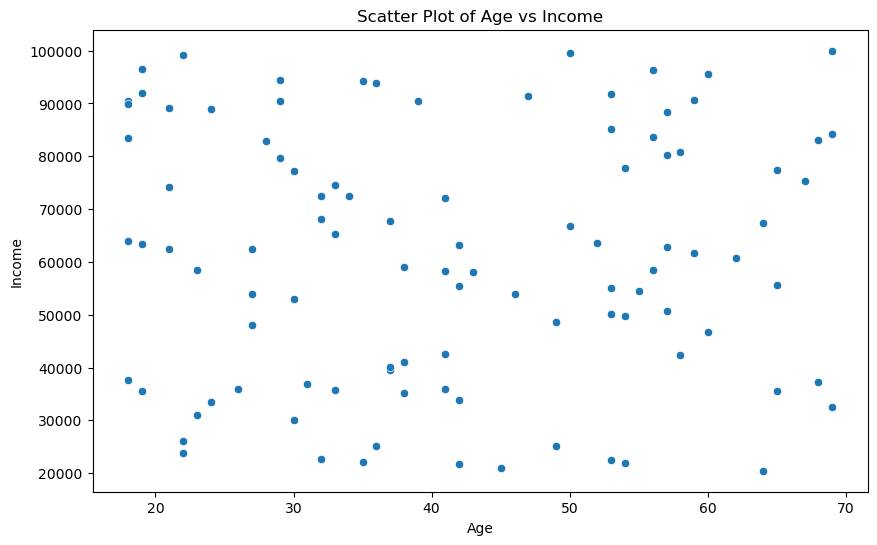

In [34]:
# Display the scatter plot to show the relationship between two continuous variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Income', data=data)
plt.title("Scatter Plot of Age vs Income")
plt.show()

<Figure size 1200x600 with 0 Axes>

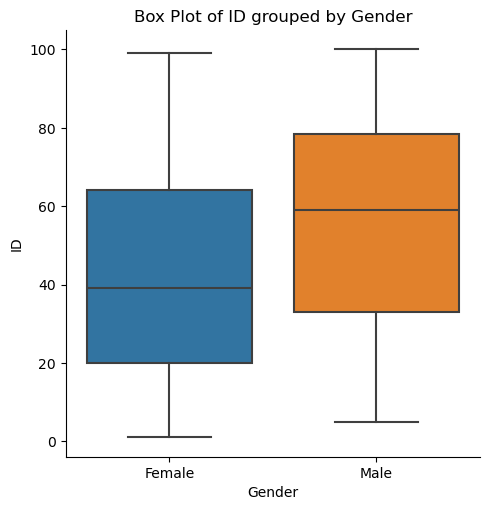

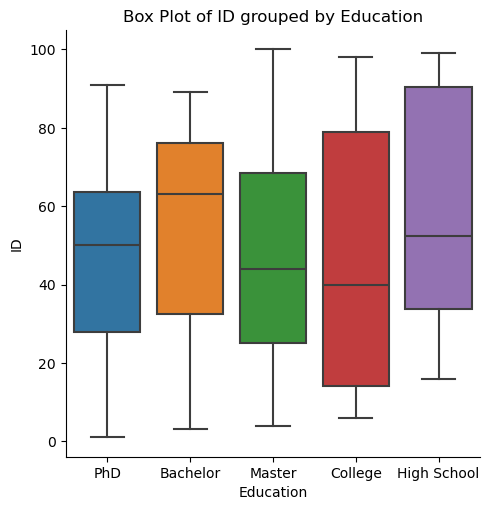

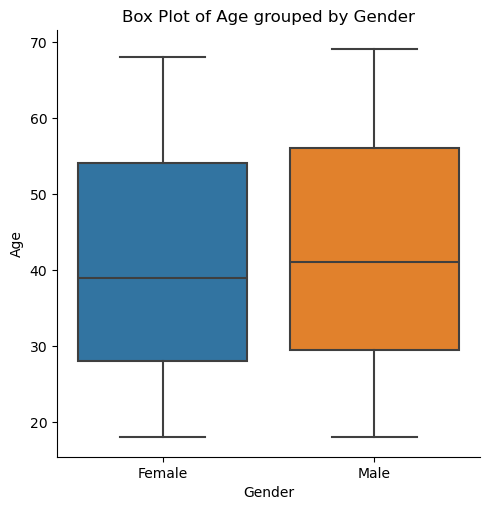

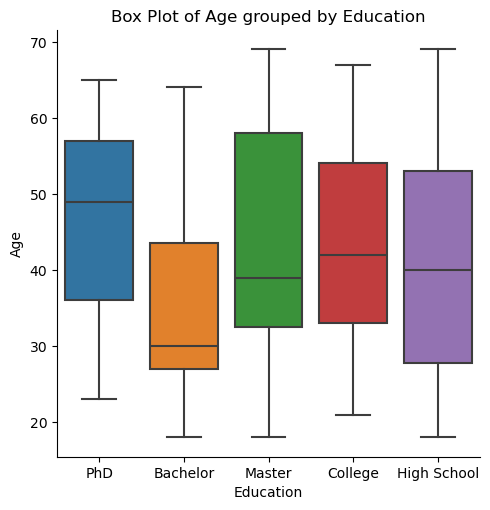

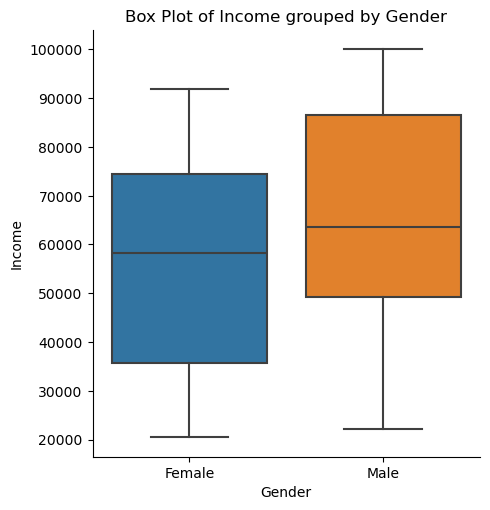

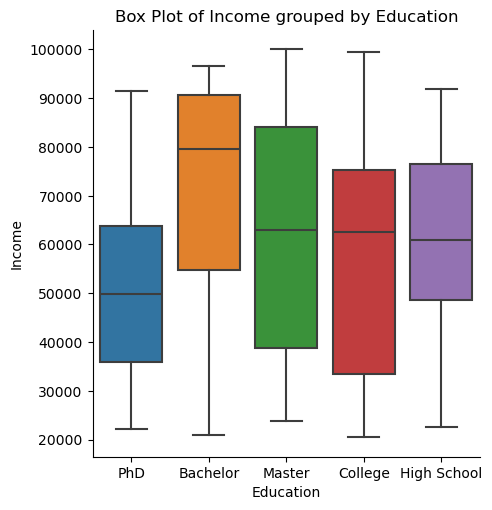

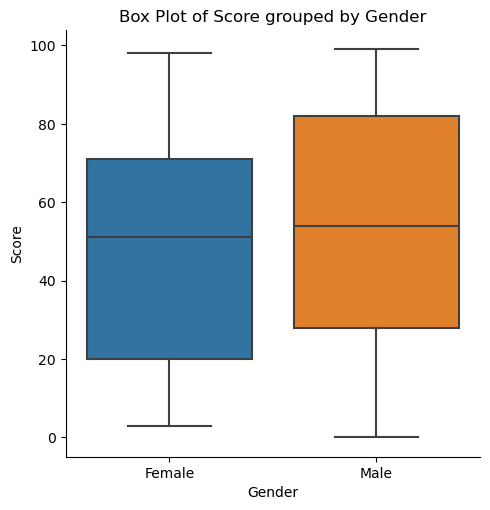

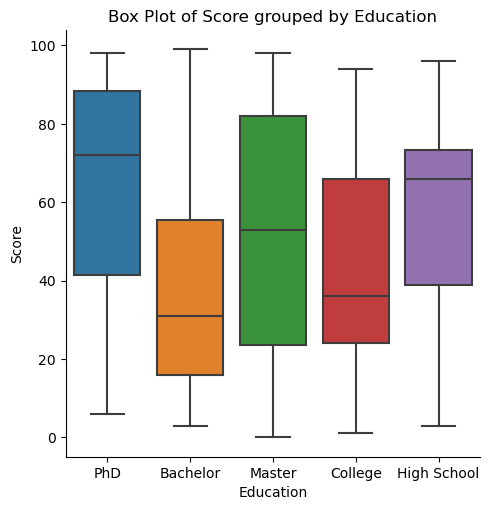

In [35]:
# Perform a bivariate analysis between continuous variable and categorical variable using categorical plot
plt.figure(figsize=(12, 6))
for num_col in numerical_cols:
    for cat_col in categorical_cols:
        sns.catplot(x=cat_col, y=num_col, data=data, kind='box')
        plt.title(f"Box Plot of {num_col} grouped by {cat_col}")
        plt.show()

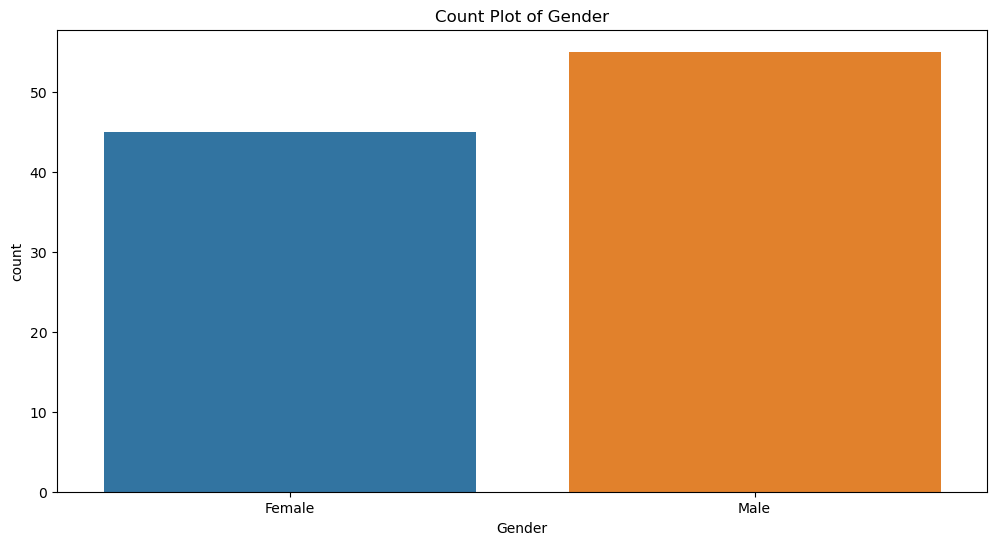

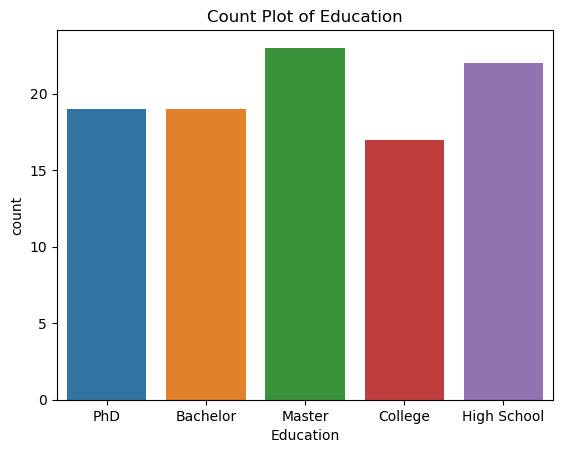

In [36]:
# Display the counts of observations for categorical variable using count plot
plt.figure(figsize=(12, 6))
for col in categorical_cols:
    sns.countplot(x=col, data=data)
    plt.title(f"Count Plot of {col}")
    plt.show()

C:\Users\mehra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mehra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mehra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mehra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

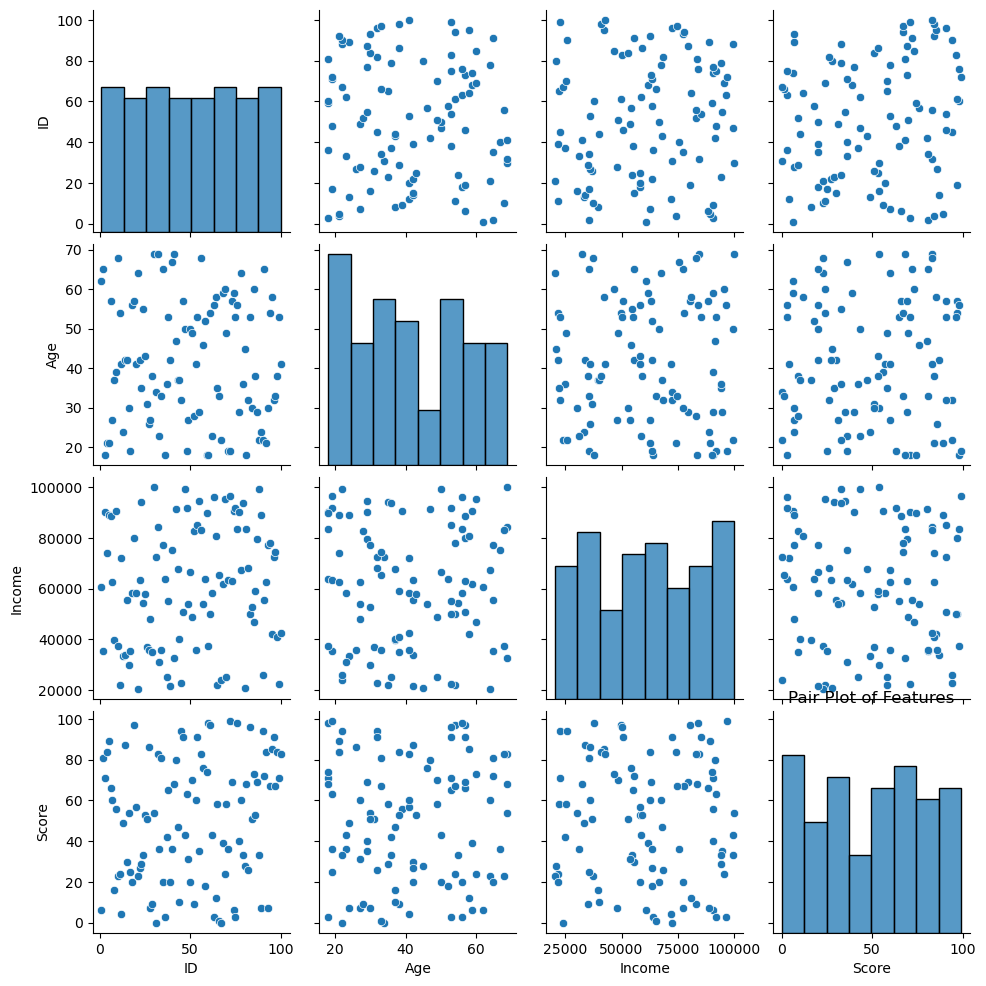

In [37]:
# Perform a multivariate analysis between features using pair plot
sns.pairplot(data)
plt.title("Pair Plot of Features")
plt.show()